In [1]:
import os
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.metrics import jaccard_score
import sys
import os
sys.path.append('..')
sys.path.append('../../src')
import torch
import torchvision
import ds_utils


In [2]:
resnet_color = 'red'
vit_color = 'blue'
random_color = 'gray'
rerun = '--'
original = '-'

In [3]:
PATCH_SIZE = 16

In [4]:
root_dir = "/mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo_slic_lime"

In [5]:
import seaborn as sns
sns.set()
# sns.set(style='ticks', font='sans-serif', font_scale=1.5)
sns.set(style='ticks', font='sans-serif')
plt.style.use('ggplot')

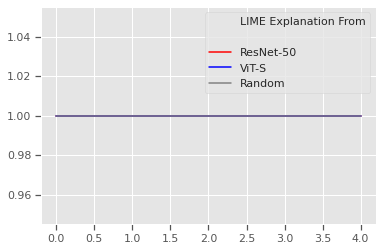

In [6]:
def get_handles():
    fig, ax = plt.subplots(1, 1)
    dummy_x = np.arange(5)
    dummy_y = np.ones(5)
    ax.plot(np.NaN, np.NaN, '.', color='none', label='LIME Explanation From')
    ax.plot(np.NaN, np.NaN, '-', color='none', label=' ')
    for name, color, style in (
        ['ResNet-50', resnet_color, original],
        ['ViT-S', vit_color, original],
        ['Random', random_color, original],
    ): 
        sns.lineplot(x=dummy_x, y=dummy_y, color=color, label=name, linestyle=style, ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    plt.show()
    return handles, labels
handles, labels = get_handles()


In [7]:
MODEL_NAMES = ['resnet50', 'deit_small_resnet_aug_missingness']
lime_envelopes = {}
for model_name in MODEL_NAMES:
    ablation_dir = os.path.join(root_dir, model_name, 'ablations')
    lime_envelope_orders = {}
    for model2_pkl in os.listdir(ablation_dir):
        if 'json' in model2_pkl or 'pkl' not in model2_pkl:
            continue
        model2 = model2_pkl.split('_order.pkl')[0]
        pickle_file = os.path.join(ablation_dir, model2_pkl)
        print("Loading", pickle_file)
        with open(pickle_file, 'rb') as f:
            lime_envelope_orders[model2] = pkl.load(f)
    lime_envelopes[model_name] = lime_envelope_orders
            

Loading /mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo_slic_lime/resnet50/ablations/deit_small_resnet_aug_missingness_order.pkl
Loading /mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo_slic_lime/resnet50/ablations/random_order.pkl
Loading /mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo_slic_lime/resnet50/ablations/resnet50_order.pkl
Loading /mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo_slic_lime/deit_small_resnet_aug_missingness/ablations/resnet50_order.pkl
Loading /mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo_slic_lime/deit_small_resnet_aug_missingness/ablations/random_order.pkl
Loading /mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/superpixel_redo_slic_lime/deit_small_resnet_aug_missingness/ablations

## Ablation Test

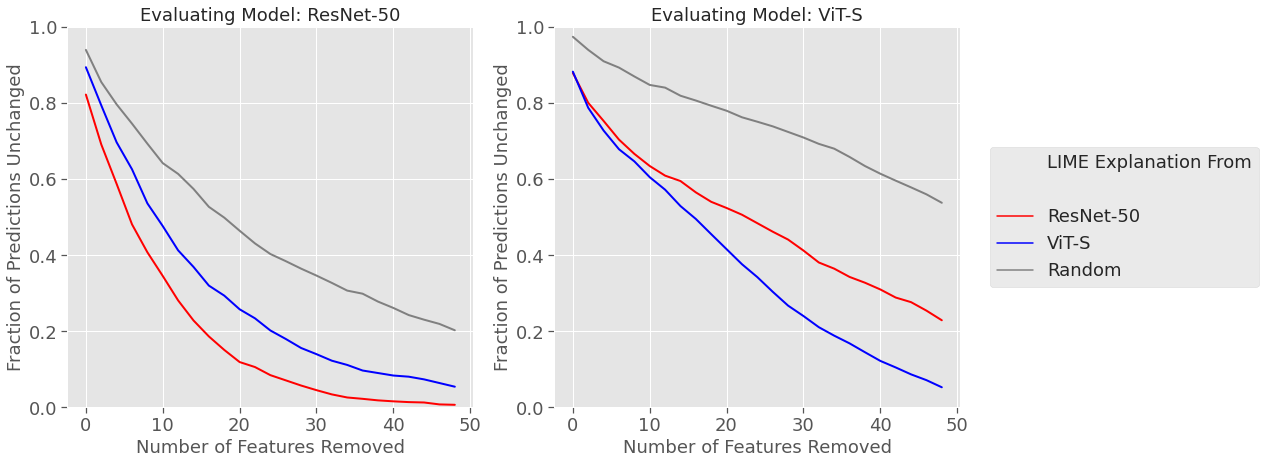

In [84]:
resnet_color = 'red'
vit_color = 'blue'
random_color = 'gray'
rerun = '--'
original = '-'
orders = {
        'resnet50':({
            'resnet50': (resnet_color, original),
            'deit_small_resnet_aug_missingness': (vit_color, original),
            'random': (random_color, original)
            }, 'ResNet-50'),
        'deit_small_resnet_aug_missingness': ({
            'resnet50': (resnet_color, original),
            'deit_small_resnet_aug_missingness': (vit_color, original),
            'random': (random_color, original)
        }, 'ViT-S'),
    }

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
for i, base_model in enumerate(['resnet50', 'deit_small_resnet_aug_missingness']):
    order, title = orders[base_model]
    for model_name in order.keys():
        x_vec = lime_envelopes[base_model][model_name]['num_features_vec']
        y_vec = lime_envelopes[base_model][model_name]['reverse_results'][example_mask].astype(int).mean(axis=0)
        sns.lineplot(x=x_vec, y=y_vec, color=order[model_name][0],
                     linewidth=2, linestyle=order[model_name][1], ax=ax[i])
    ax[i].set_title("Evaluating Model: " + title, fontsize=18)
    ax[i].set_ylabel("Fraction of Predictions Unchanged", fontsize=18)
    ax[i].set_xlabel("Number of Features Removed", fontsize=18)
    ax[i].set_ylim(0,1)
    ax[i].tick_params(axis='x', labelsize=18)
    ax[i].tick_params(axis='y', labelsize=18)
ax[0].legend([],[], frameon=False)
ax[1].legend(handles, labels, frameon=True, bbox_to_anchor=(1.05, 0.5), loc='center left', fontsize=18)
plt.savefig(f'superpixel_lime_plot.pdf', bbox_inches='tight')
plt.show()

In [16]:
lime_envelopes['resnet50']['random']['reverse_results'].shape

(10000, 25)

In [12]:
lime_envelopes[base_model][model_name]['reverse_results'].shape

(10000, 25)

In [13]:
import numpy as np
superpixels = np.load("/mnt/nfs/home/saachij/src/CausalDomainTransfer/patch_ablation/missingness_results/saliency_maps/slic_superpixel.npy")

(array([3.000e+00, 7.000e+00, 2.400e+01, 7.800e+01, 3.320e+02, 8.490e+02,
        2.214e+03, 3.096e+03, 2.727e+03, 6.700e+02]),
 array([ 58. ,  66.5,  75. ,  83.5,  92. , 100.5, 109. , 117.5, 126. ,
        134.5, 143. ]),
 <BarContainer object of 10 artists>)

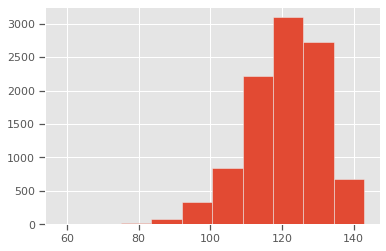

In [21]:
plt.hist(superpixels.reshape(10000, -1).max(axis=1))

In [80]:
max_vals = superpixels.reshape(10000, -1).max(axis=1)
example_mask = np.logical_and(max_vals < 150, max_vals >= 130)

In [81]:
max_vals.mean()

120.3583

In [82]:
example_mask.astype(int).sum()

1976

In [39]:
lime_envelopes[base_model][model_name]['reverse_results'][example_mask].astype(int).mean(axis=0)

array([0.97196831, 0.93662401, 0.90615478, 0.89031079, 0.86837294,
       0.84582572, 0.83912249, 0.81779403, 0.80499695, 0.79098111,
       0.77635588, 0.76051188, 0.7519805 , 0.73430835, 0.72273004,
       0.70749543, 0.6928702 , 0.67885436, 0.65569775, 0.6337599 ,
       0.61608775, 0.59780622, 0.57708714, 0.56124314, 0.54113346])